<a href="https://colab.research.google.com/github/ElenaTratsevskaya/Analyzing-User-Behavior-in-Digital-Game/blob/main/Analyzing_User_Behavior_in_Digital_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                    Project-3_Tratsevskaya Elena

Ц Е Л Ь

**Исследовать поведение пользователей в обновлённом приложении мобильной игры Quiz Freeze**

З А Д А Ч И
1. Определить, насколько обучение сокращает время прохождения этапов игры.
2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.
3. Определить, насколько прозрачен процесс взаимодействия с игрой.

КОНКРЕТНЫЕ    ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)

1. Загрузим обе таблицы, выделим только пользователей, которые зарегистрировались в 2018 году (с 1 января по 31 декабря 2018 года включительно), приведем даты к нужному формату, переименуем столбцы и объединим таблицы
2. Сравним время прохождения различных этапов у пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выясним, насколько, построим графики.
3. Проверим, существует ли зависимость между оплатой вопросов и количеством обучений.
4. Выясним, как часто пользователи начинают обучение после выбора уровня сложности. Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.
5. Подведем итоги.

<font size=+1><span style="color:darkred">**Г И П О Т Е З Ы**</span></font>

1. Обучение влияет на скорость прохождения других этапов игры
2. Повторное прохождение обучения положительно влияет на оплату.
3. Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение?

ИCХОДНЫЕ ДАННЫЕ ПРЕДСТВЫЛЕНЫ В ТАБЛИЦАХ:

**E v e n t** хранит данные о событиях, которые совершают пользователи. По сути, каждое событие — это факт прохождения пользователем какого-либо этапа игры.
<table>
<thead>
<tr><th>Название поля</th><th>Описание</th></tr>
</thead>
<tbody>
<tr><td>id</td><td>идентификатор события</td></tr>
<tr><td>user_id</td><td>уникальный идентификатор пользователя в приложении</td></tr>
<tr><td>start_time</td><td>дата и время события</td></tr>
<tr><td>event_type</td><td>уникальный идентификатор пользователя (значения:</td></tr> 
<tr><td>-"-</td><td>registration — регистрация; tutorial_start — начало обучения; tutorial_finish — завершение обучения;</td></tr>
<tr><td>-"-</td><td>level_choice — выбор уровня сложности; pack_choice — выбор пакетов вопросов)</td></tr>
<tr><td>tutorial_id </td><td>идентификатор события</td></tr>
<tr><td>user_id</td><td>идентификатор обучения (этот идентификатор есть только у событий обучения)</td></tr>
</tbody>
</table>

**p u r c h a s e** хранит данные об оплатах, которые совершают пользователи.

<table>
<thead>
<tr><th>Название поля</th><th>Описание</th></tr>
</thead>
<tbody>
<tr><td>id</td><td>идентификатор события</td></tr>
<tr><td>user_id</td><td>уникальный идентификатор пользователя, совершившего событие в приложении</td></tr>
<tr><td>event_datetime</td><td>дата и время события/покупки</td></tr>
<tr><td>event_type</td><td>уникальный идентификатор пользователя</td></tr> 
<tr><td>amount</td><td>сумма оплаты</td></tr>
</tbody>
</table>

In [ ]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

ПОДГОТОВКА ДАННЫХ (ФОРМАЛИЗОВАННАЯ ЗАДАЧА 1)

**1.1.** Загружаем таблицу events, фильтруем по условию: "пользователи, которые зарегистрировались в 2018 году" (с 1 января по 31 декабря 2018 года включительно), форматируем время.

In [4]:
events = pd.read_csv('events.csv', sep=',')

events_df = events.copy() # Копия для работы и сохранения исх. DF
mask1 = (events_df['start_time'] >= '2018-01-01') & (events_df['start_time'] < '2019-01-01') & (events_df['event_type'] == 'registration')
users_2018 = events_df[mask1]['user_id'].to_list()
events_df  = events_df[events_df['user_id'].isin(users_2018)]

events_df["start_time"] = pd.to_datetime(events_df["start_time"])
events_df = events_df.rename(columns={"id": "event_id"})
events_df

,event_id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836
...,...,...,...,...,...,...
118359,147262,tutorial_start,NaN,2019-01-01 03:26:18,49554.0,47756
118360,147263,tutorial_finish,NaN,2019-01-01 03:29:25,49554.0,47756
118362,147265,level_choice,easy,2019-01-01 05:04:52,NaN,47755
118363,147266,level_choice,medium,2019-01-01 05:42:11,NaN,47756


**1.2.** Загружаем таблицу purchase, фильтруем по условию: "пользователи, которые зарегистрировались в 2018 году" (с 1 января по 31 декабря 2018 года включительно), формаируем время, создадим новый столбец 'event_type'.

In [5]:
purchase = pd.read_csv('purchase.csv', sep=',')

purchase_df= purchase.copy() # Копия для работы и сохранения исх. DF

purchase_df  = purchase_df[purchase_df['user_id'].isin(users_2018)]
purchase_df['event_datetime'] = pd.to_datetime(purchase_df['event_datetime'])
purchase_df['event_type'] = 'purchase'

purchase_df = purchase_df.rename(columns={"id": "purchase_id", "event_datetime": "start_time"})
purchase_df

,purchase_id,user_id,start_time,amount,event_type
1171,16845,27845,2018-01-03 18:53:43,100,purchase
1172,16846,27865,2018-01-04 14:46:10,250,purchase
1174,16848,27911,2018-01-07 08:19:12,50,purchase
1175,16849,27910,2018-01-07 12:11:34,100,purchase
1176,16850,27940,2018-01-07 13:16:41,200,purchase
...,...,...,...,...,...
2767,18441,47498,2019-01-02 03:48:19,100,purchase
2768,18442,47647,2019-01-02 23:26:26,150,purchase
2769,18443,47554,2019-01-03 00:36:36,50,purchase
2774,18448,47742,2019-01-04 12:51:41,50,purchase


In [6]:
# Объеденяем два датафрейма
total_events_df = pd.concat([events_df,purchase_df], sort=False)
# сбросим индексы объединённого датафрейма (так как после объединения они дублировались и несут мало смысла) 
total_events_df = total_events_df.reset_index(drop=True).sort_values('start_time') 
total_events_df 

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN
...,...,...,...,...,...,...,...,...
68554,NaN,purchase,NaN,2019-01-02 03:48:19,NaN,47498,18441.0,100.0
68555,NaN,purchase,NaN,2019-01-02 23:26:26,NaN,47647,18442.0,150.0
68556,NaN,purchase,NaN,2019-01-03 00:36:36,NaN,47554,18443.0,50.0
68557,NaN,purchase,NaN,2019-01-04 12:51:41,NaN,47742,18448.0,50.0


In [7]:
registration_users_df = total_events_df[total_events_df['event_type'] == 'registration']
registration_users_df

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN
...,...,...,...,...,...,...,...,...
66941,147249.0,registration,NaN,2018-12-31 18:58:55,NaN,47753,NaN,NaN
66942,147250.0,registration,NaN,2018-12-31 19:14:08,NaN,47754,NaN,NaN
66947,147255.0,registration,NaN,2018-12-31 21:15:14,NaN,47755,NaN,NaN
66950,147258.0,registration,NaN,2018-12-31 23:17:30,NaN,47756,NaN,NaN


<font size=+1><center><span style="color:#8B0000">**ГИПОТЕЗА ПЕРВАЯ:**<span>   <span style="color:#696969">**Обучение влияет на скорость прохождения других этапов игры.**<span></center><font>








(ФОРМАЛИЗОВАННАЯ ЗАДАЧА 2) Сравнить время прохождения различных этапов у пользователей, которые завершили обучение, и пользователей, не начинавших и не заканчивавших обучение.

<span style="color:#8B0000">**2.1.**<span> <span style="color:#000000">Выделим две группы пользователей: тех, кто начал обучение и тех, кто завершил обучение.<span>

In [8]:
tutorial_start_users_df = total_events_df[total_events_df['event_type'] == 'tutorial_start']
tutorial_start_users = total_events_df[(total_events_df['event_type'] == 'tutorial_start')]["user_id"].unique()

tutorial_finish_users_df = total_events_df[total_events_df['event_type'] == 'tutorial_finish']
tutorial_finish_users = total_events_df[(total_events_df['event_type'] == 'tutorial_finish')]["user_id"].unique()

<span style="color:#8B0000">**2.2.**<span> <span style="color:#000000">С помощью функции разделим пользователей на группы: "1" закончили обучение / "2" начали обучение / "0" не заканчивали и не начинали обучение и добавим новую колонку 'user_groups' в датафрейм.<span> 

In [9]:
def sort_users(x): 
    if x in tutorial_finish_users:
        return 1
    elif x in tutorial_start_users: 
        return 2 
    else:
        return 0

total_events_df['user_groups'] = total_events_df['user_id'].apply(sort_users)
total_events_df

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount,user_groups
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN,0
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN,1
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN,1
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN,1
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
68554,NaN,purchase,NaN,2019-01-02 03:48:19,NaN,47498,18441.0,100.0,1
68555,NaN,purchase,NaN,2019-01-02 23:26:26,NaN,47647,18442.0,150.0,1
68556,NaN,purchase,NaN,2019-01-03 00:36:36,NaN,47554,18443.0,50.0,1
68557,NaN,purchase,NaN,2019-01-04 12:51:41,NaN,47742,18448.0,50.0,1


<span style="color:#8B0000">**2.3.**<span> <span style="color:#000000">Для дальнйшего анализа нас интерсуют только пользователи прошедшие обучение и не начинавшие и не проходившие обучение. Фильтруем датафрейм.<span>

In [10]:
# Удаляем строки по условию: "2" начали обучение
filter_df = total_events_df.drop(total_events_df[total_events_df.user_groups == 2].index)
filter_df

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount,user_groups
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN,0
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN,1
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN,1
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN,1
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
68554,NaN,purchase,NaN,2019-01-02 03:48:19,NaN,47498,18441.0,100.0,1
68555,NaN,purchase,NaN,2019-01-02 23:26:26,NaN,47647,18442.0,150.0,1
68556,NaN,purchase,NaN,2019-01-03 00:36:36,NaN,47554,18443.0,50.0,1
68557,NaN,purchase,NaN,2019-01-04 12:51:41,NaN,47742,18448.0,50.0,1


<span style="color:#8B0000">**2.4.**<span> <span style="color:#000000">Выявим наиболее популярные пути событий в имеющихся последовательностях датафрейма.<span>

In [11]:
# Воссоздаём последовательность событий.
# Для этого воспользуемся методом groupby по столбцу event_type и применим агрегирующую функцию apply(list).
user_path_df = (
    filter_df.groupby(["user_id"])["event_type"].apply(list).reset_index()
)
user_path_df

,user_id,event_type
0,27832,[registration]
1,27833,"[registration, tutorial_start, tutorial_finish]"
2,27834,"[registration, tutorial_start, tutorial_finish]"
3,27835,"[registration, tutorial_start, tutorial_finish..."
4,27836,"[registration, tutorial_start, tutorial_start,..."
...,...,...
18313,47753,"[registration, tutorial_start, tutorial_finish..."
18314,47754,[registration]
18315,47755,"[registration, tutorial_start, tutorial_finish..."
18316,47756,"[registration, tutorial_start, tutorial_finish..."


In [12]:
# Преобразуем список событий в строку event_path.
user_path_df["event_path"] = user_path_df["event_type"].apply(lambda x: " > ".join(x))

# Выведем 10 самых популярных последовательностей.
user_paths = (
    user_path_df.groupby(["event_path"])["user_id"]
    .nunique()
    .sort_values(ascending=False)
)
user_paths[user_paths.index.str.contains('purchase')].head(10)

event_path
registration > tutorial_start > tutorial_finish > level_choice > pack_choice > purchase                                                                                                             1083
registration > tutorial_start > tutorial_finish > level_choice > pack_choice > tutorial_start > tutorial_finish > purchase                                                                           101
registration > tutorial_start > tutorial_finish > tutorial_start > tutorial_finish > level_choice > pack_choice > purchase                                                                            52
registration > tutorial_start > tutorial_start > tutorial_finish > level_choice > pack_choice > purchase                                                                                              26
registration > level_choice > pack_choice > purchase                                                                                                                                     

<span style="color:#8B0000">**2.5.**<span> <span style="color:#000000">Создадём сводную таблицу со временем в качестве значений и типом событий в качестве названий столбцов.<span>

In [13]:
pivot = filter_df.pivot_table(
    values='start_time',
    index=['user_id', 'user_groups'],
    columns='event_type',
    aggfunc='min'
)
pivot

,event_type,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
user_id,user_groups,,,,,,
27832,0,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT
27833,1,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
27834,1,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
27835,1,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
27836,1,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40
...,...,...,...,...,...,...,...
47753,1,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56
47754,0,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT
47755,1,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14


In [14]:
pivot.info() # Смотрим общую картину по числу пользователей на событие.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18318 entries, (27832, 0) to (47757, 0)
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   level_choice     7599 non-null   datetime64[ns]
 1   pack_choice      5250 non-null   datetime64[ns]
 2   purchase         1469 non-null   datetime64[ns]
 3   registration     18318 non-null  datetime64[ns]
 4   tutorial_finish  10250 non-null  datetime64[ns]
 5   tutorial_start   10250 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 1.0 MB


<span style="color:#8B0000">**2.6.**<span> <span style="color:#000000">Идентифицируем временные пробежутки и создадим столбцы в нашей сводной таблице. Посчитаем временную разницу. Для проверки гипотезы 1 выполним группировку и построим столбчатую диаграмму.<span>

In [15]:
# Применяем / pd.Timedelta('1 hour') 
pivot['time_d_all'] = (pivot['purchase'] - pivot['registration']) / pd.Timedelta('1 hour') # Время на всю последовательность
pivot['time_d_1'] = (pivot['tutorial_start'] - pivot['registration']) / pd.Timedelta('1 hour') # Время от регистрации до начала обучения
pivot['time_d_2'] = (pivot['tutorial_finish'] - pivot['tutorial_start']) / pd.Timedelta('1 hour') # Время на обучение
pivot['time_d_3'] = (pivot['level_choice'] - pivot['tutorial_finish']) / pd.Timedelta('1 hour') # Время от завершения обучения до выбора уровня сложности
pivot['time_d_4'] = (pivot['pack_choice'] - pivot['level_choice']) / pd.Timedelta('1 hour') # Время от выбора уровня сложности до выбора пакета вопросов
pivot['time_d_5'] = (pivot['purchase'] - pivot['pack_choice']) / pd.Timedelta('1 hour') # Время от выбора пакета вопросов до оплаты
pivot['time_d_6'] = (pivot['level_choice'] - pivot['registration']) / pd.Timedelta('1 hour') # Время от регистрации до выбора уровня сложности

pivot.head(10)

,event_type,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,time_d_all,time_d_1,time_d_2,time_d_3,time_d_4,time_d_5,time_d_6
user_id,user_groups,,,,,,,,,,,,,
27832,0,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27833,1,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,NaN,13.670833,0.041111,NaN,NaN,NaN,NaN
27834,1,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,NaN,11.183611,0.030556,NaN,NaN,NaN,NaN
27835,1,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,NaN,3.101111,0.090000,5.518611,0.022500,NaN,8.709722
27836,1,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,NaN,1.442500,0.805000,NaN,NaN,NaN,NaN
27837,0,NaT,NaT,NaT,2018-01-01 14:08:40,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27838,0,NaT,NaT,NaT,2018-01-01 14:42:58,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27839,1,2018-01-01 22:37:50,2018-01-01 22:42:54,NaT,2018-01-01 18:24:01,2018-01-01 19:16:32,2018-01-01 19:11:36,NaN,0.793056,0.082222,3.355000,0.084444,NaN,4.230278
27841,1,NaT,NaT,NaT,2018-01-01 22:25:14,2018-01-02 07:46:18,2018-01-02 07:40:19,NaN,9.251389,0.099722,NaN,NaN,NaN,NaN


In [16]:
# Посмотрим распределение времени (среднее значение) по временным отрезкам. Время в часах. 
gr_gaps = pivot.groupby(by ='user_groups')[['time_d_all', 'time_d_1','time_d_2','time_d_3','time_d_4','time_d_5','time_d_6']].mean()
gr_gaps

event_type,time_d_all,time_d_1,time_d_2,time_d_3,time_d_4,time_d_5,time_d_6
user_groups,,,,,,,
0,105.100530,NaN,NaN,NaN,0.089951,100.825997,5.259201
1,96.500902,4.518038,0.20384,2.329711,0.088374,89.299900,7.093571


<span style="color:red">**В Ы В О Д**<span> <span style="color:#000000">(промежуточный)<span>
<blockquote>
<p>Средний показатель времени на обучения - time_d_2 низкий по сравнению с суммарным средним временем на всю цепочку, самое больше слагаемое - среднее время от выбора пакета вопросов до оплаты - time_d_5. Не проходившие обучение пользователи здесь имеют заметно более высокий показатель по сравнению с пользователями, проходившими обучение. Именно значение по time_d_5 является определяющим в образовании разрыва по времени прохождения всего пользовательского пути двух групп пользователей.<p>

<span style="color:#8B0000">**2.7.**<span> <span style="color:#000000">Посмотрим на среднее время прохождения всего пользовательского пути (время в часах), получим разницу времени в часах на прохождение всей цепочки пользователями групп и  выполним визуализацию для демонстрации полученной разницы разницы.<span> 

In [17]:
# Сгруппируем по типам пользователей сумарное среднее время и полученим исходную таблицу для визуализации. 
gr_all = pivot.groupby(by ='user_groups')['time_d_all'].mean() 
gr_all = gr_all.reset_index()
gr_all

,user_groups,time_d_all
0,0,105.100530
1,1,96.500902


In [18]:
# Выведем разницу (искомое значение)
delta = gr_all.at[0, 'time_d_all'] - gr_all.at[1, 'time_d_all']
display(round(delta, 1))

8.6

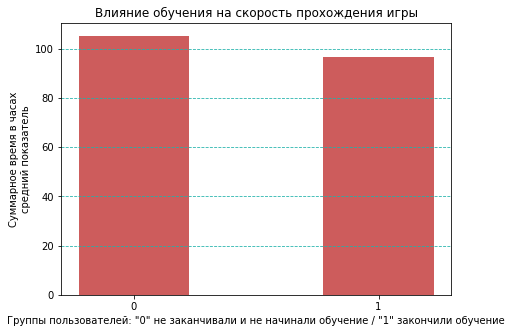

In [19]:
# Визуализируем полученную таблицу с помощью столбчатой диаграммы.
fig = plt.figure(figsize = (7,5))

plt.bar(gr_all.user_groups.astype(str), 
        gr_all.time_d_all, 
        color = '#CD5C5C',
        width = 0.45)

plt.xlabel('Группы пользователей: "0" не заканчивали и не начинали обучение / "1" закончили обучение')
plt.ylabel('Суммарное время в часах\nсредний показатель')
plt.title('Влияние обучения на скорость прохождения игры')
plt.grid(axis='y', color = '#20B2AA', linestyle='dashed')
plt.show()

<font size=+1><span style="color:red">**В Ы В О Д**<span></font>
<blockquote><p>Пользователи завершившие обучение в среднем проходят курс почти на 9 часов быстрее пользователей, чем пользователи не начинавшие и не закочившие (не проходившие) обучение.<p>

<span style="color:#8B0000">**ГИПОТЕЗА  ПЕРВАЯ:**<span> <span style="color:#808080"> **Обучение влияет на скорость прохождения других этапов игры** -<span>
<span style="color:darkred">**В Е Р Н А**<span>

<font size=+1><center><span style="color:#483D8D">**ГИПОТЕЗА ВТОРАЯ:**<span> <span style="color:#808080"> **Повторное прохождение обучения положительно влияет на оплату.**<span></center></font>

(ФОРМАЛИЗОВАННАЯ ЗАДАЧА 3) Проверим, существует ли зависимость между оплатой вопросов и количеством обучений.

<span style="color:#483D8D"><strong><em>Комментарий:</strong><em><span> 
<span style="color:#000000">*Для дальнейшей работы берём польный датафрейм, до фильтрации.*<span>


<span style="color:#483D8D">**3.1.**<span> <span style="color:#000000">Создаём сводную таблицу, разносим event_type в колонки, в качестве агрегирующей функции берём count.<span>

In [20]:
# Здесь мы работаем с полным DF.
pivot_2 = total_events_df.pivot_table(
    values='start_time',
    index='user_id',
    columns='event_type',
    aggfunc='count'
)
pivot_2.purchase=pivot_2['purchase'].fillna(0) # Заполняем пропуски, чтобы далее корректно выполнить агрегирование.
pivot_2

event_type,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
user_id,,,,,,
27832,NaN,NaN,0.0,1.0,NaN,NaN
27833,NaN,NaN,0.0,1.0,1.0,1.0
27834,NaN,NaN,0.0,1.0,1.0,1.0
27835,1.0,1.0,0.0,1.0,1.0,1.0
27836,NaN,NaN,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...
47753,1.0,1.0,0.0,1.0,1.0,1.0
47754,NaN,NaN,0.0,1.0,NaN,NaN
47755,1.0,NaN,0.0,1.0,1.0,1.0


<span style="color:#483D8D">**3.2.**<span> <span style="color:#000000">Для анализа зависимости между оплатой вопросов и количеством обучений сделаем группирувку и на базе полученных показателей построим столбчатую диаграмму.<span>

In [21]:
#Группируем тех, кто платил (количество оплат берём среднее), по количеству обучений.
count_tutorial_finish = pivot_2.groupby('tutorial_finish')['purchase'].mean()
count_tutorial_finish = count_tutorial_finish.reset_index()
count_tutorial_finish

,tutorial_finish,purchase
0,1.0,0.142608
1,2.0,0.137774
2,3.0,0.127536
3,4.0,0.106742
4,5.0,0.162393
5,6.0,0.148515
6,7.0,0.154639
7,8.0,0.111111
8,9.0,0.181818


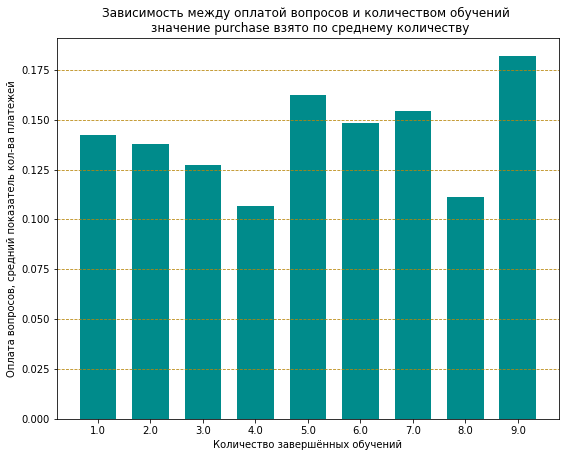

In [22]:
fig = plt.figure(figsize = (9,7))

plt.bar(count_tutorial_finish.tutorial_finish.astype(str), 
        count_tutorial_finish.purchase, 
        color = '#008B8B',
        width = 0.7)

plt.xlabel('Количество завершённых обучений')
plt.ylabel('Оплата вопросов, средний показатель кол-ва платежей')
plt.title('Зависимость между оплатой вопросов и количеством обучений \n значение purchase взято по среднему количеству')
plt.grid(axis='y', color = '#B8860B', linestyle='dashed')
plt.show()

<font size=+1><span style="color:red">**В Ы В О Д**<span></font>
<blockquote>
<p>Характер стобчатой диаграммы - среднее количество оплат по количеству обучений (нет существенных всплесков и провалов в наполнении столбиков) демонстрирует нам, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.<p> 

<span style="color:#483D8D">**ГИПОТЕЗА ВТОРАЯ:**<span> <span style="color:#808080"> **Повторное прохождение обучения положительно влияет на оплату**<span> <span style="color:#483D8D">- **В Е Р Н А**<span>

**ДОПОЛНИТЕЛЬНОЕ ИССЛЕДОВАНИЕ 1**

Посмотрим средний чек по количеству обучений.

<span style="color:#483D8D">**3.3.**<span> <span style="color:#000000">Посмотрим зависимость между оплатой вопросов и количеством обучений через показатель amount. Для этого необходимо в нашу таблицу pivot_2 добавить колонку  amount, агрегированную по показателю sum.<span>

In [23]:
# Выпоним группировку исходного объединённого датафрейма - total_events_df по соответствующим показателям.
sum_amount = total_events_df.groupby('user_id')['amount'].sum()
#sum_amount.reset_index()
sum_amount.to_frame()

,amount
user_id,
27832,0.0
27833,0.0
27834,0.0
27835,0.0
27836,0.0
...,...
47753,0.0
47754,0.0
47755,0.0


In [24]:
#Получаем датафрейм из сводной таблицы pivot_2 с дпополнительной колонкой amount, агрегированной по показателю sum.
total_df = pd.merge(pivot_2, sum_amount, on="user_id")
total_df

,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,amount
user_id,,,,,,,
27832,NaN,NaN,0.0,1.0,NaN,NaN,0.0
27833,NaN,NaN,0.0,1.0,1.0,1.0,0.0
27834,NaN,NaN,0.0,1.0,1.0,1.0,0.0
27835,1.0,1.0,0.0,1.0,1.0,1.0,0.0
27836,NaN,NaN,0.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...
47753,1.0,1.0,0.0,1.0,1.0,1.0,0.0
47754,NaN,NaN,0.0,1.0,NaN,NaN,0.0
47755,1.0,NaN,0.0,1.0,1.0,1.0,0.0


<span style="color:#483D8D">**3.4.**<span> <span style="color:#000000">Группируем средний по сумме оплаты показатель по количеству обучений и визуализируем полученные данные.<span>

In [25]:
# Выполняем группировку.
count_tutorial_amount = total_df.groupby('tutorial_finish')['amount'].mean()
count_tutorial_amount = count_tutorial_amount.reset_index()
count_tutorial_amount

,tutorial_finish,amount
0,1.0,15.723643
1,2.0,15.613172
2,3.0,15.869565
3,4.0,10.955056
4,5.0,16.666667
5,6.0,16.089109
6,7.0,18.041237
7,8.0,14.814815
8,9.0,18.181818


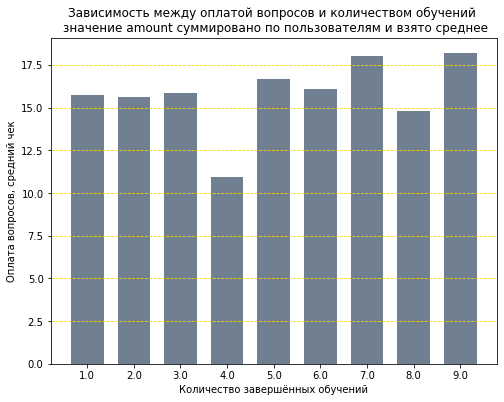

In [26]:
# Строим столбчатую диаграмму среднего чека.
fig = plt.figure(figsize = (8,6))

plt.bar(count_tutorial_amount.tutorial_finish.astype(str), 
        count_tutorial_amount.amount, 
        color = 'slategrey',
        width = 0.7)

plt.xlabel('Количество завершённых обучений')
plt.ylabel('Оплата вопросов, средний чек')
plt.title(
    'Зависимость между оплатой вопросов и количеством обучений \n значение amount суммировано по пользователям и взято среднее'
)
plt.grid(axis='y', color = 'gold', linestyle='dashed')
plt.show()

<span style="color:red">**В Ы В О Д**<span> <span style="color:#000000">(по дополнительному исследованию 1)<span>
<blockquote>
<p>В данном случае столбчатая диаграмма по среднему чеку имеет схожию линию тренда со столбчатой диаграммой конверсии.<p>

**ДОПОЛНИТЕЛЬНОЕ ИССЛЕДОВАНИЕ 2**

<span style="color:#483D8D">**3.5.**<span> <span style="color:#000000">Посмотрим на долю выручки от пользователей, проходящих повторное и блее обучение, от общей суммы.<span>

In [27]:
#Группируем показатель суммы оплаты по количеству обучений.
sum_tutorial_amount = total_df.groupby('tutorial_finish')['amount'].sum()
sum_tutorial_amount.reset_index()

,tutorial_finish,amount
0,1.0,126025.0
1,2.0,20625.0
2,3.0,5475.0
3,4.0,1950.0
4,5.0,1950.0
5,6.0,1625.0
6,7.0,1750.0
7,8.0,800.0
8,9.0,400.0


<strong><em>Комментарий:</strong><em>
*Результат группировки показывает абсолютные значения показателя суммы оплаты по количеству обучений. Для наглядности визуализируем данные.*

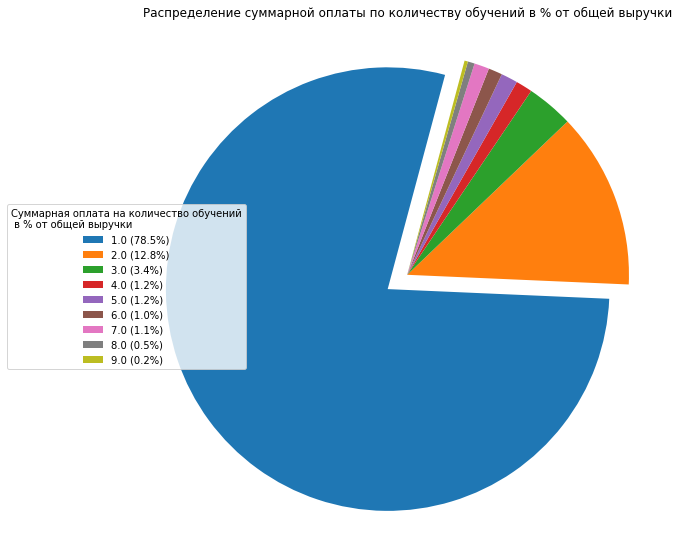

In [28]:
# Построим круговую диаграмму долей суммарной оплаты от общей выручки по количеству обучений.
count_tutorial = sum_tutorial_amount.index.to_list()
values = sum_tutorial_amount.to_list()
total = sum(values)
labels = [f"{n} ({v/total:.1%})" for n,v in zip(count_tutorial, values)]

fig = plt.figure(figsize=(7, 7))
axes = fig.add_axes([0, 0, 1, 1])

plt.title('Распределение суммарной оплаты по количеству обучений в % от общей выручки')

plt.pie(
    values, radius=1.1,
    startangle = 75,
    explode=[0.12] + [0 for _ in range(len(count_tutorial) - 1)])

plt.legend(title ="Суммарная оплата на количество обучений\n в % от общей выручки",
    bbox_to_anchor = (-0.06, 0.4, 0.25, 0.25),
    loc = 'best', labels = labels)
plt.show()

<span style="color:red">**В Ы В О Д**<span> <span style="color:#000000">(по дополнительному исследованию 2)<span>
<blockquote>
<p>Основная оплата поступает за первое обучение 78.5% от общей суммы выручки, чуть более 20% выручки составляют повтрные покупки. Детализация в выделенном сегменте в соответствии с легендой.<p>

<font size=+1><center><span style="color:#2F4F4F">**ГИПОТЕЗА ТРЕТЬЯ:**<span> <span style="color:#808080">**Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение?**<span></center></font>

(ФОРМАЛИЗОВАННАЯ ЗАДАЧА 4)Выясним, как часто пользователи начинают обучение после выбора уровня сложности. Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.

<span style="color:#2F4F4F">**4.1.**<span> <span style="color:#000000">Создадим датафрейм с событиями (event_type): начало обучения (tutorial_start) и выбор уровня сложности (level_choice). Для этого из основного датафрейма (total_events_df) выделим отдельный датафрейм, который будет содержать только события начало обучения (tutorial_start). Затем аналогично выделим отдельный датафрейм, который будет содержать только события выбора уровня сложности (level_choice).<span> 

In [29]:
#Создаём отдельный датафрейм tutorial_start_df, который будет содержать только события с event_type = tutorial_start.
tutorial_start_df = total_events_df[total_events_df['event_type'] == 'tutorial_start']
# Удаляем строки по условию: "2" начали обучение
tutorial_start_df

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount,user_groups
7,80315.0,tutorial_start,NaN,2018-01-01 14:54:40,31505.0,27836,NaN,NaN,1
8,80316.0,tutorial_start,NaN,2018-01-01 15:00:51,31506.0,27835,NaN,NaN,1
10,80318.0,tutorial_start,NaN,2018-01-01 15:40:43,31507.0,27836,NaN,NaN,1
12,80320.0,tutorial_start,NaN,2018-01-01 17:47:40,31508.0,27833,NaN,NaN,1
15,80323.0,tutorial_start,NaN,2018-01-01 19:11:36,31509.0,27839,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
66934,147242.0,tutorial_start,NaN,2018-12-31 10:21:11,49550.0,47747,NaN,NaN,1
66943,147251.0,tutorial_start,NaN,2018-12-31 19:38:14,49551.0,47751,NaN,NaN,1
66945,147253.0,tutorial_start,NaN,2018-12-31 20:54:56,49552.0,47753,NaN,NaN,1
66952,147260.0,tutorial_start,NaN,2019-01-01 00:08:14,49553.0,47755,NaN,NaN,1


In [30]:
#Создаём  отдельный датафрейм tutorial_start_df, который будет содержать только события с event_type = level_choice.
level_choice_df = total_events_df[total_events_df["event_type"] == "level_choice"]
level_choice_df

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount,user_groups
19,80327.0,level_choice,medium,2018-01-01 20:37:22,NaN,27835,NaN,NaN,1
23,80331.0,level_choice,hard,2018-01-01 22:37:50,NaN,27839,NaN,NaN,1
36,80344.0,level_choice,medium,2018-01-02 05:18:42,NaN,27840,NaN,NaN,2
38,80346.0,level_choice,hard,2018-01-02 06:19:18,NaN,27845,NaN,NaN,1
45,80353.0,level_choice,easy,2018-01-02 08:46:03,NaN,27842,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
66932,147240.0,level_choice,medium,2018-12-31 09:59:00,NaN,47732,NaN,NaN,1
66937,147245.0,level_choice,medium,2018-12-31 12:24:40,NaN,47747,NaN,NaN,1
66948,147256.0,level_choice,medium,2018-12-31 22:36:19,NaN,47753,NaN,NaN,1
66956,147265.0,level_choice,easy,2019-01-01 05:04:52,NaN,47755,NaN,NaN,1


<span style="color:#2F4F4F">**4.2.**<span> <span style="color:#000000">В полученных датафреймах нас интересует информация start_time по пользователям. Преобразуем полученные датафреймы в новые только с соответствующей колонкой start_time  по user_id. Поскольку название колонок start_time совпадает в обоих датафреймах, во избежании ошибки при последующем объединении требуется переименование колонку start_time хотя бы в одном датафрейме.<span>

In [31]:
#Формируем датафрейм с двумя интересующими нас колонками.
tutorial_start_df = tutorial_start_df[["user_id", "start_time"]]
display(tutorial_start_df)
display(tutorial_start_df['user_id'].value_counts().mean()) #Посмотрим сколько пользователей в среднем у события - начало обучения.

,user_id,start_time
7,27836,2018-01-01 14:54:40
8,27835,2018-01-01 15:00:51
10,27836,2018-01-01 15:40:43
12,27833,2018-01-01 17:47:40
15,27839,2018-01-01 19:11:36
...,...,...
66934,47747,2018-12-31 10:21:11
66943,47751,2018-12-31 19:38:14
66945,47753,2018-12-31 20:54:56
66952,47755,2019-01-01 00:08:14


1.522179119581717

<span style="color:red">**В Ы В О Д**<span> <span style="color:#000000">(промежуточный)<span>
<blockquote>
<p>Среднее значение больше единицы говорит о том, что у некоторых пользователей более чем по одному событию начала обучения, т.е. они возвращались к обучению. Первое обучение всегда идет до выбора уровня сложности.<p>

In [32]:
#Формируем датафрейм с двумя интересующими нас колонками и переименовываем совпадающую по названию колонку.
level_choice_df = level_choice_df[["user_id", "start_time"]].rename(columns={"start_time": "start_time_l"})
display(level_choice_df)
display(level_choice_df["user_id"].value_counts().mean()) #Посмотрим сколько у пользователей события - выбор уровня сложно

,user_id,start_time_l
19,27835,2018-01-01 20:37:22
23,27839,2018-01-01 22:37:50
36,27840,2018-01-02 05:18:42
38,27845,2018-01-02 06:19:18
45,27842,2018-01-02 08:46:03
...,...,...
66932,47732,2018-12-31 09:59:00
66937,47747,2018-12-31 12:24:40
66948,47753,2018-12-31 22:36:19
66956,47755,2019-01-01 05:04:52


1.0

<span style="color:#2F4F4F">**4.3.**<span> <span style="color:#000000">Объеденим вновь созданные датафреймы.<span>

In [33]:
#Объеденим созданные датафреймы.
all_df = level_choice_df.merge(tutorial_start_df, on="user_id", how="inner")
all_df

,user_id,start_time_l,start_time
0,27835,2018-01-01 20:37:22,2018-01-01 15:00:51
1,27839,2018-01-01 22:37:50,2018-01-01 19:11:36
2,27840,2018-01-02 05:18:42,2018-01-02 02:07:07
3,27845,2018-01-02 06:19:18,2018-01-02 03:03:44
4,27845,2018-01-02 06:19:18,2018-01-02 07:08:00
...,...,...,...
12681,47732,2018-12-31 09:59:00,2018-12-31 07:14:38
12682,47747,2018-12-31 12:24:40,2018-12-31 10:21:11
12683,47753,2018-12-31 22:36:19,2018-12-31 20:54:56
12684,47755,2019-01-01 05:04:52,2019-01-01 00:08:14


<span style="color:#2F4F4F">**4.4.**<span> <span style="color:#000000">Необходимо разделить пользователей по количеству события - начало обучения. Для этого в созданный датафрейм введём дополнительную колонку разницы событий: начало обучения и выбор уровня сложности.<span>

In [34]:
# Применяем / pd.Timedelta('1 hour') и получим разницу в часах.
all_df["delta_time"] = (all_df["start_time"] - all_df["start_time_l"])/pd.Timedelta('1 hour')
all_df

,user_id,start_time_l,start_time,delta_time
0,27835,2018-01-01 20:37:22,2018-01-01 15:00:51,-5.608611
1,27839,2018-01-01 22:37:50,2018-01-01 19:11:36,-3.437222
2,27840,2018-01-02 05:18:42,2018-01-02 02:07:07,-3.193056
3,27845,2018-01-02 06:19:18,2018-01-02 03:03:44,-3.259444
4,27845,2018-01-02 06:19:18,2018-01-02 07:08:00,0.811667
...,...,...,...,...
12681,47732,2018-12-31 09:59:00,2018-12-31 07:14:38,-2.739444
12682,47747,2018-12-31 12:24:40,2018-12-31 10:21:11,-2.058056
12683,47753,2018-12-31 22:36:19,2018-12-31 20:54:56,-1.689722
12684,47755,2019-01-01 05:04:52,2019-01-01 00:08:14,-4.943889


<strong><em><span style="color:#2F4F4F">Комментарий:<span></strong><em>
<span style="color:#000000">Если время 'tutorial_start' - время "level_choice" положительное, значит пользователь пошёл обычным путём, а потом вернулся на старт обучения и время второго старта обучения поглощает время первого старата обучения в этих данных. И получается формально: время выбора уровня сложности раньше времени обучения.<span>

<span style="color:#2F4F4F">**4.5.**<span> <span style="color:#000000">В новой колонке датафрейма all_df есть значения с отрицательным знаком, и это означает, что пользователь пошел предполагаемым путем: сначала прошел обучение, затем выбрал уровень сложности. Если обучение у пользвоателя было и их было несколько попыток, то первая попытка всегда до выбора уровня сложности. С помощью функции разделим пользователей в колонке delta_time на группы: "1" - пользователь сначала прошел обучение, затем выбрал уровень сложности и "0" - обучение после выбора уровня сложности (искомая группа).<span>

In [35]:
def f_tutorial_choice(x): 
    if x < 0:
        return 1
    else:
        return 0

all_df['tutorial_choice'] = all_df['delta_time'].apply(f_tutorial_choice)
all_df 

,user_id,start_time_l,start_time,delta_time,tutorial_choice
0,27835,2018-01-01 20:37:22,2018-01-01 15:00:51,-5.608611,1
1,27839,2018-01-01 22:37:50,2018-01-01 19:11:36,-3.437222,1
2,27840,2018-01-02 05:18:42,2018-01-02 02:07:07,-3.193056,1
3,27845,2018-01-02 06:19:18,2018-01-02 03:03:44,-3.259444,1
4,27845,2018-01-02 06:19:18,2018-01-02 07:08:00,0.811667,0
...,...,...,...,...,...
12681,47732,2018-12-31 09:59:00,2018-12-31 07:14:38,-2.739444,1
12682,47747,2018-12-31 12:24:40,2018-12-31 10:21:11,-2.058056,1
12683,47753,2018-12-31 22:36:19,2018-12-31 20:54:56,-1.689722,1
12684,47755,2019-01-01 05:04:52,2019-01-01 00:08:14,-4.943889,1


<span style="color:#2F4F4F">**4.6.**<span> <span style="color:#000000">Сгруппируем пользователей и посмотрим сколько пользователей выбрали уровень сложности до обучения (искомая группа) и после (пользователи, прошедшие предполагаемым путём - обучение - выбор уровня сложности).<span>

In [36]:
count_df = all_df.groupby('tutorial_choice')['user_id'].nunique()
count_df.reset_index()

,tutorial_choice,user_id
0,0,1386
1,1,8244


In [37]:
# Всего уникальных пользователей
all_df.groupby('tutorial_choice')['user_id'].nunique().sum()

9630

<span style="color:red">**В Ы В О Д**<span> <span style="color:#000000">(промежуточный)<span>
<blockquote>
<p>Получили количество уникальных пользователей по группам. Искомая группа  - 1386 пользователей.<p>

<span style="color:#2F4F4F">**4.7.**<span> <span style="color:#000000">Визуализируем полученную в ходе группировки таблицу.<span>

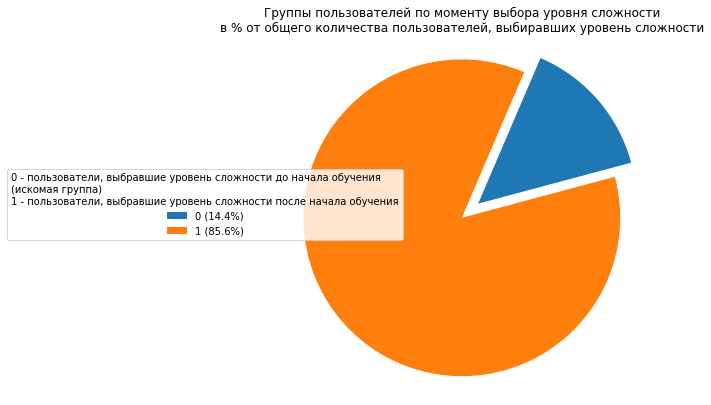

In [38]:
# Построим круговую диаграмму долей суммарной оплаты от общей выручки по количеству обучений. 
# Учитываем уникальное количество пользователей.
count_tutorial = count_df.index.to_list()
count_values = count_df.to_list()
total = sum(count_values)
labels = [f"{n} ({v/total:.1%})" for n,v in zip(count_tutorial, count_values)]

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])

plt.title('Группы пользователей по моменту выбора уровня сложности\nв % от общего количества пользователей, выбиравших уровень сложности')

plt.pie(
    count_values, radius=1.1,
    startangle = 15,
    explode=[0.15] + [0 for _ in range(len(count_tutorial) - 1)])

plt.legend(
    title ="0 - пользователи, выбравшие уровень сложности до начала обучения\n(искомая группа)\n1 - пользователи, выбравшие уровень сложности после начала обучения",
    bbox_to_anchor = (0.1, 0.4, 0.25, 0.25),
    loc = 'best', labels = labels)
plt.show()

<font size=+1><span style="color:red">**В Ы В О Д**<span></font>
<blockquote>
<p>Процент пользователей, выбравших уровень сложности до начала обучения от общего количества пользователей, выбиравших уровень сложности: 14.4%. В абсолютных показателях это 1386 уникальных пользователей.
Процент пользователей, выбирающих уровень сложности после начала обчения, составляет 85.6% от общего количества пользователей, выбиравших уровень сложности. В абсолютных показателях это 8244 уникальных пользователей.<p>

<strong><em><span style="color:#2F4F4F">Комментарий:<span></strong><em>
<span style="color:#000000">Точных критериев порога прозрачности условием не задано.<span>
    
<em><span style="color:#000000">Определение понятности, как субьективное, взяла из статьи о понятности ПО на <a href="https://habr.com/ru/company/otus/blog/529622/">Хабр</a><span></em>

<blockquote>
<p>Полученный разсклад по процентам групп пользователей, выбирающих уровень сложности, говорит о прозрачности процесса взаимодействия с игрой. 14.4% пользователей от общего количества пользователей, выбирающих уровень сложности, выбирают уровень сложности до начала обучения, т.е. повторно обращаются к обучению. Это значит, что работа с приложением скорее понятна.<p>

<font size=+1><center><span style="color:#DC143C"><h1>**И Т О Г И**</h1><span></center><font>

**ЗАДАЧИ ВЫПОЛНЕНЫ**

1. Определить, насколько обучение сокращает время прохождения этапов игры.

*Пользователи завершившие обучение в среднем проходят курс на 9 часов быстрее, чем пользователи не начинавшие и не закочившие (не проходившие) обучение.*

2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

*Построены столбчатые диаграммы конверсии и среднего чека, которые показывают, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.*

3. Определить, насколько прозрачен процесс взаимодействия с игрой.

*Процесс взаимодействия с игрой прозрачен. 85.6% пользователей от общего количества пользователей, выбиравших уровень сложности, выбирают уровень сложности после обучения.*

**ГИПОТЕЗЫ ПРОВЕРЕНЫ**

_____________________________________________________________________________________________

**ГИПОТЕЗА ПЕРВАЯ:** Обучение влияет на скорость прохождения других этапов игры - **В Е Р Н А**


**ГИПОТЕЗА ВТОРАЯ:** Повторное прохождение обучения положительно влияет на оплату - **В Е Р Н А**


**ГИПОТЕЗА ТРЕТЬЯ:** Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение? 

**ОТВЕТ утвердительный -** да, будет потом проходить обучение.